# Usage Accumulation

## introduction

#### The purpose of this script is to get usage accumulation

In [102]:
%run include/required_libs.py
%matplotlib inline  
cycles = list(range(2013,2019))

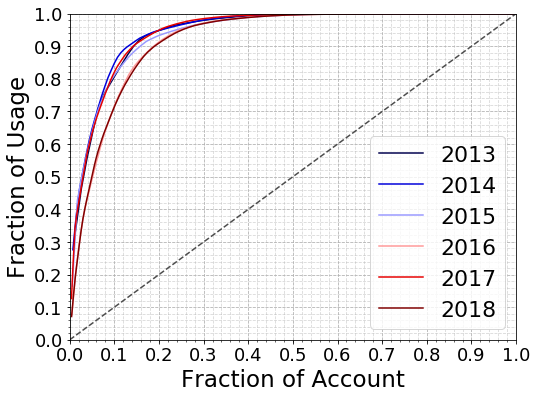

In [103]:
fig, ax = plt.subplots()

for i in cycles:
    su = pd.read_csv('rawdata/usage_by_cycles_group_'+ str(i) + '.csv')
    su = su[['cycle','account','su']]  # only need these columns
    su = su.groupby(['account'])['su'].sum().to_frame()
    
    su = su.sort_values('su',ascending = False)
    su[i] = su['su']/sum(su['su']) 
    
    su['por'] = 1/ len(su) 
    su['Fraction of Account'] = su['por'].cumsum()
    su.set_index('Fraction of Account',inplace=True)
    ax = su[i].cumsum().plot(color=plt.cm.get_cmap('seismic')((i-2013)/5))
    
plt.ylabel('Fraction of Usage', fontsize=23)                             ## label size
plt.xlabel('Fraction of Account', fontsize=23)                             ## label size
ax.xaxis.set_tick_params(labelsize=18)                                             ## tick size
ax.yaxis.set_tick_params(labelsize=18)
fig.set_size_inches(8, 6)                                                         ## figure size
ax.set_ylim([0,1])

# grid:
major_ticks = np.arange(0, 1.1, 0.1)
minor_ticks = np.arange(0, 1, 0.02)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.legend(fontsize=22)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.5,ls='--')
ax.grid(which='major', alpha=0.8,ls='--')

# diag_line
def on_change(axes): # make sure even if xlim, ylim changed, the line is still diag

    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change);
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

fig.savefig('image/2_4_accumulated_usage.png')

### How many groups are under-usage (2018)

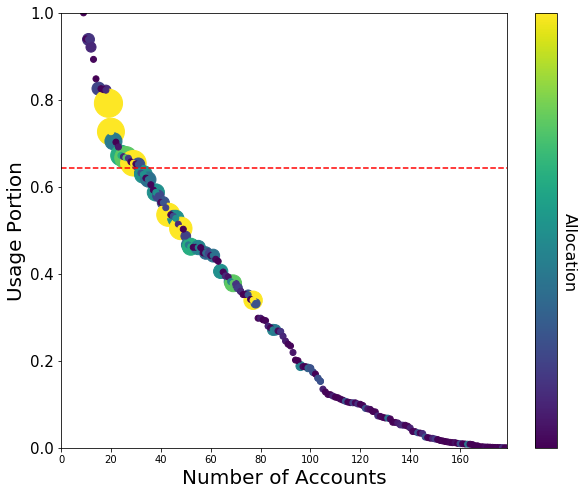

In [104]:
al = pd.read_csv('rawdata/allocs_by_cycle_group.csv')
us = pd.read_csv('rawdata/usages_by_cycle_group.csv')
alc = al[al.cycle.isin(['2018'])]
usa = us[us.cycle.isin(['2018'])]
alc = alc[['account','allocation']]
alc = alc.join(usa.set_index('account'), on='account')
use = alc[['account','allocation','su']].fillna(0)
use['use_portion'] = use['su'] / use['allocation']
use = use.sort_values('use_portion',ascending=False).head(180).reset_index(drop=True)

gap_day = list(usa.groupby(['cycle']).count()['su'])[-1] 
day_portion = gap_day/ 365
import numpy as np
fig, ax = plt.subplots()
ax.scatter(use.index, use['use_portion'], s = use['su']/4000, c =use['allocation']/10000);
ax.set_ylim(0,1)
ax.set_xlim(0,use.index[-1])
fig.set_size_inches(10, 8)  

# add colorbar based on axis
def plot_something(ax):
    x = use.index
    y = use['use_portion']
    c = use['allocation']
    ax.scatter(x,y,c=c)
                                
ax.yaxis.set_tick_params(labelsize=15)   ## tick size
plt.ylabel('Usage Portion', fontsize=20)                             ## label size
plt.xlabel('Number of Accounts', fontsize=20)
plot_something(ax)
cbar = fig.colorbar(mappable=ax.collections[0],ticks=[0,0])
cbar.ax.set_ylabel('Allocation', rotation=270,fontsize=16, labelpad=20, y=0.45)
cbar.ax.set_yticklabels(["Low","High"])

plt.axhline(y=day_portion, color='r', linestyle='--');
fig.savefig('image/2_4_Usage_Rate.png')

In [105]:
al = pd.read_csv('rawdata/allocs_by_cycle_group.csv')
al = al.groupby(['account','cycle'])['allocation'].sum().reset_index()
al['allocation'] = al['allocation']/1000000
al

,account,cycle,allocation
0,pi-aachien,2013,0.050000
1,pi-aachien,2014,0.350000
2,pi-aachien,2015,0.500000
3,pi-aachien,2016,0.050000
4,pi-aachien,2017,0.438569
5,pi-aachien,2018,0.373612
6,pi-aaz,2013,0.075000
7,pi-aaz,2014,0.080000
8,pi-aaz,2015,0.080000
9,pi-aaz,2016,1.093000


### Relation between Allocation and Usage Portion

ValueError: max must be larger than min in range parameter.

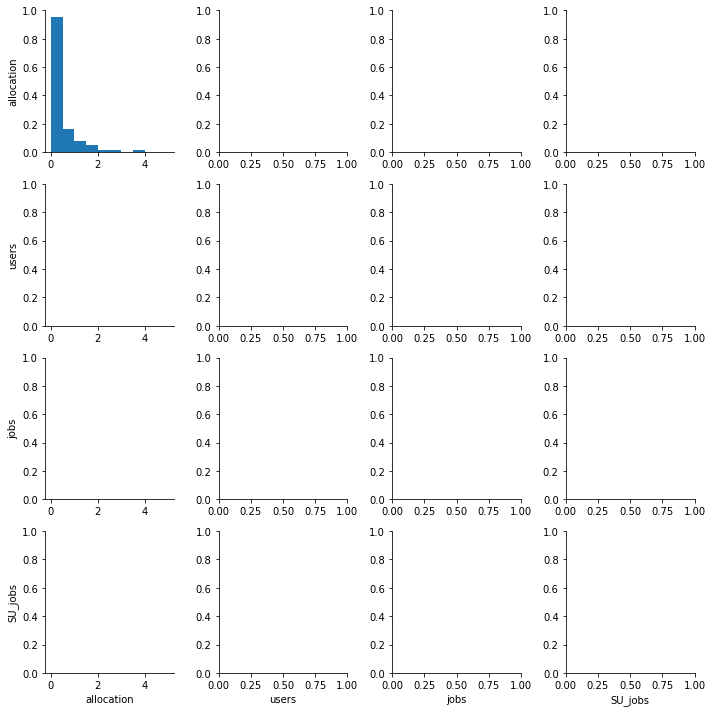

In [115]:
us = pd.read_csv('rawdata/usages_by_cycle_group.csv')
al = pd.read_csv('rawdata/allocs_by_cycle_group.csv')
al = al.drop('cycle',axis=1)
au = al.join(us.set_index('account'), on='account')
au['SU_jobs'] = au['su'] / au['jobs']
au['use_portion'] = au['su'] / au['allocation']
au['use_portion'][au.use_portion > 1] 
au['allocation'] = au['allocation']/1000000
au['allocation'][au.allocation > 5] = 5
au['users'][au.users > 150] = 150
au['jobs'][au.jobs>3000000]=3000000
au['jobs'] = au['jobs']/1000000
au.set_index('allocation',inplace=True)

#
aa=au.reset_index()
aa['Group'] = 'normal'
aa['Group'][aa.allocation >= 4] = 'vip'
au5 = aa[['allocation','users','jobs','SU_jobs']]
pl = sns.pairplot(au5)
#pl.set(ylim=(0, None));
#pl.savefig("image/2_4_Matrix_Analysis.png")

KeyError: 'Usage_portion'

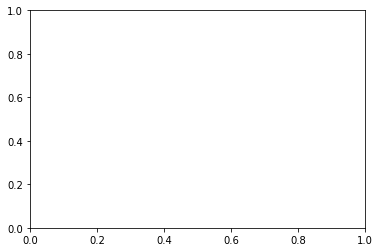

In [107]:
fig, ax = plt.subplots()
ax.scatter(au.index, au['Usage_portion'], s = au['users']*10, c =au['Usages_per_job'], alpha=.2);
ax.set_ylim(0,1)
ax.set_xlim(0,9)
fig.set_size_inches(10, 8)  

# add colorbar based on axis
def plot_something(ax):
    x = au.index
    y = au['Usage_portion']
    c = au['Usages_per_job']
    ax.scatter(x,y,c=c)

ax.yaxis.set_tick_params(labelsize=15)   ## tick size
plt.ylabel('Usage Portion', fontsize=20)                             ## label size
plt.xlabel('Allocation', fontsize=20)
plot_something(ax)
cbar = fig.colorbar(mappable=ax.collections[0],ticks=[0,0])
cbar.ax.set_ylabel('Average su per job', rotation=270,fontsize=16, labelpad=20, y=0.45);